['run0.csv', 'run1.csv', 'run2.csv', 'run3.csv']
['/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/nf1600_n/run0.csv', '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/nf1600_n/run1.csv', '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/nf1600_n/run2.csv', '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/nf1600_n/run3.csv']
['run0.csv', 'run1.csv', 'run2.csv', 'run3.csv']


/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 5.00000006  2.49483354  0.06139805  2.50534099]
[   0  800 1600 2400]


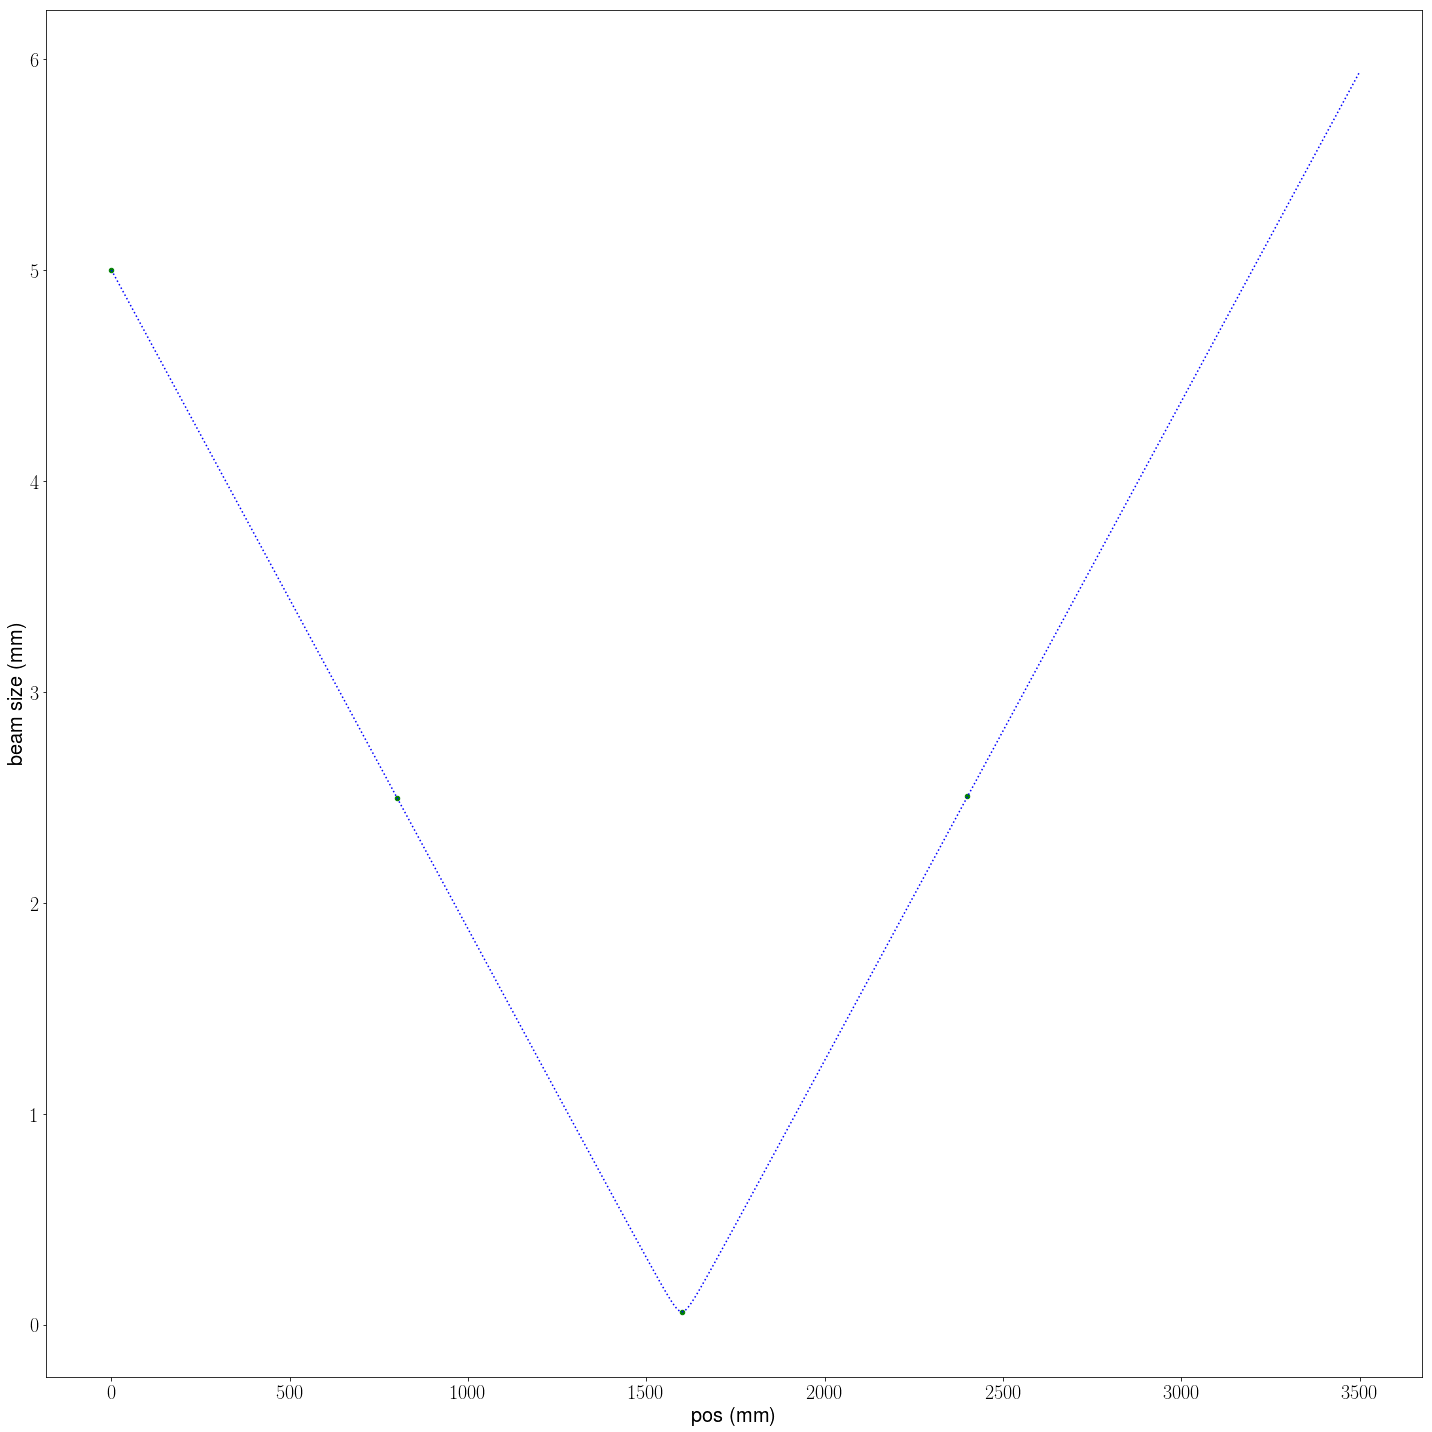

In [54]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

path = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/nf1600_n/'

cpath = Popen(["pwd"], cwd=path, stdout=PIPE, stderr=PIPE )
lpath = Popen(['ls'], cwd = path, stdout=PIPE, stderr=PIPE )
path_data = cpath.communicate()[0].decode('utf-8').rstrip()
ldata = lpath.communicate()[0].decode('utf-8').splitlines()
labels = []
paths = []
for i in ldata:
    labels.append(i)
    paths.append(path_data+'/'+i)

print(labels)
print(paths)
print(labels)
data = data_generator(paths)


waist = np.multiply(2, fit_parameter_extractor(gaussian, data)[2])

print(waist)

lens_arr = []

pos = np.arange(0, 3000,800)
lens_pos = np.arange(0,3500,0.01)
print(pos)

for i in lens_pos:
    lens_arr.append(lens_waist_size(i,5,600,1600 ))

plt.figure(figsize=(20,20))    
plt.plot(lens_pos, lens_arr, color = 'blue', linestyle = ':')
plt.scatter(pos, waist, color = 'green', s=20)
plt.xlabel('pos (mm)', fontsize=20)
plt.ylabel('beam size (mm)',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
plt.tight_layout()


['runaL1', 'runaL2', 'runat0', 'runatl2m3', 'runatm3m4', 'runbL1']
[5.0000000527263575, 5.0001207895368536, 4.9829321659027572, 11.585064151312656, 13.106813679245136, 11.240332042388708]
[1.0, 1.0000241473618445, 0.99658642267127706, 2.3170128058290023, 2.6213627082060458, 2.2480663847712714]
[15.850641513126556, 31.068136792451355, 12.403320423887081]


/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


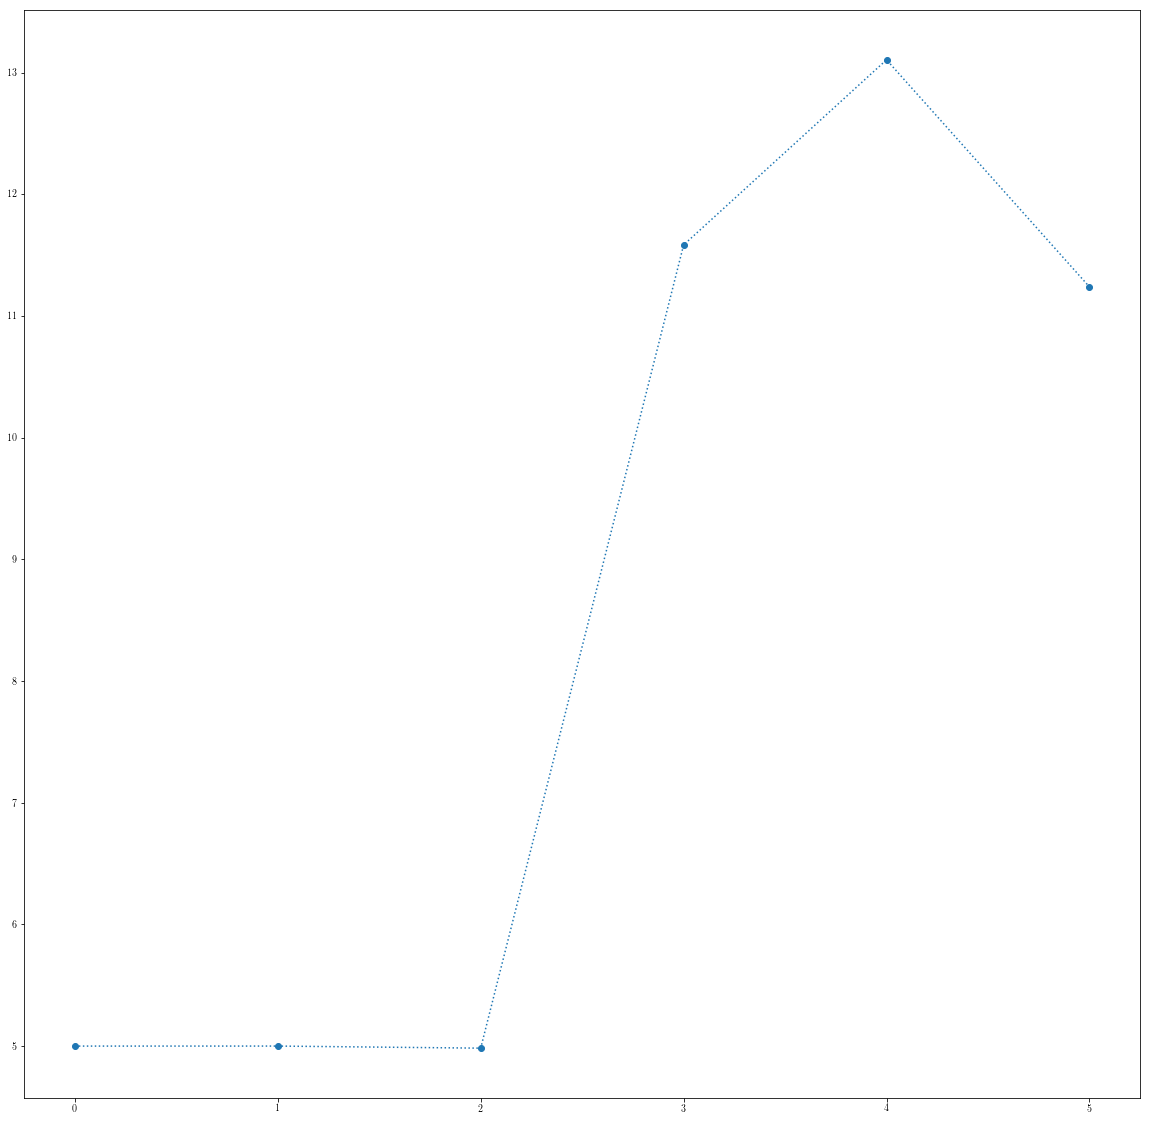

In [1]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

def set_path():
    curr = Popen(["pwd"], stdout=PIPE, stderr=PIPE)
    c_path = curr.communicate()[0].decode('utf-8').rsplit()
    curr_files = Popen(["ls"], stdout=PIPE, stderr=PIPE)
    c_listing = curr_files.communicate()[0].decode('utf-8').rsplit()
    return(c_path, c_listing)

curr_path = set_path()



c_paths = data_pathfiles_generator(curr_path[0])
fnames = filename_generator(curr_path[0])
c_paths
print(fnames)
#data pull-up

mag_data = data_generator(c_paths)

#do the plots 

#plot_generator(mag_data, 2, 3, 20, 20, 0.95, 20, 20, 20, 'x', 'irr', 'transport first segments', fnames, 'fseg')

def waist_filter(data_run):
    dr_x = []
    dr_y = []
    for i in range(len(data_run[0])): 
        if data_run[0][i] > -20 and data_run[0][i] < 20:
            dr_x.append(data_run[0][i])
            dr_y.append(data_run[1][i])
    return(dr_x, dr_y)

free_space_segment = [mag_data[2], mag_data[5] ]
l2_segment = [mag_data[1], mag_data[3], mag_data[4]]
l1_segment = [mag_data[0]]              

fs_waist = np.multiply(2, fit_parameter_extractor(gaussian, free_space_segment)[2])
l1_waist = np.multiply(2, fit_parameter_extractor(gaussian, l1_segment)[2])
l2_waist = np.multiply(2, fit_parameter_extractor(gaussian, l2_segment)[2])


waist_t = []

th_waist = 5 
col_data = []

for i in l2_waist:
    diff = i - np.multiply(2,th_waist)
    col_data.append(100*np.divide(np.abs(diff),np.multiply(2,th_waist)))
col_data

for i in (fs_waist):
    waist_t.append(i)
for i in l1_waist:
    waist_t.append(i)
for i in l2_waist:
    waist_t.append(i)
print(waist_t)

mag_values = []

for i in range(len(waist_t)):
    mag_values.append(waist_t[i]/ waist_t[0])

print(mag_values)
print(col_data)
s = plt.figure(figsize=(20,20))
s0 = s.add_subplot(111)
s0.plot(waist_t, linestyle = ':', marker = 'o')

/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 11.58500592   1.71308355   8.15892681  18.03087914  27.90283462
  37.77479303]
[    0.    616.4  1232.8  1849.2  2465.6  3082. ]


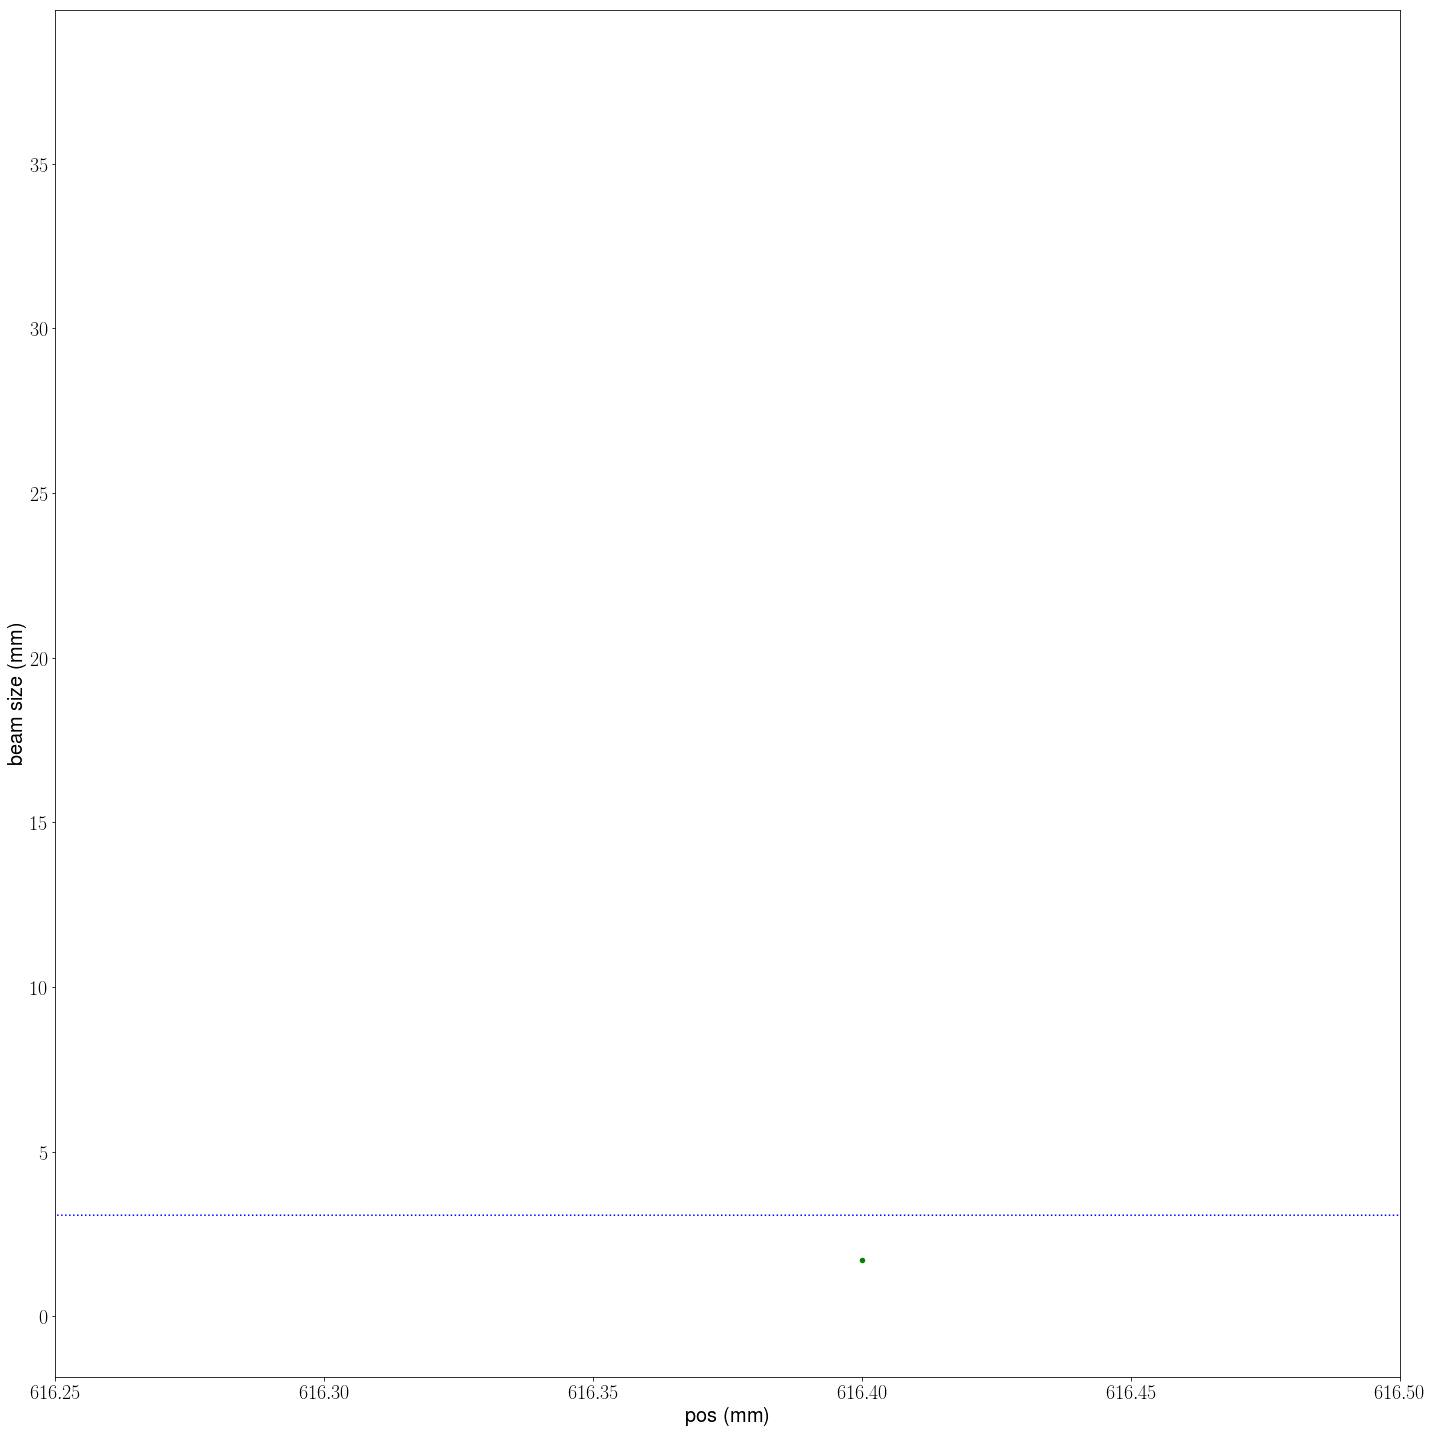

In [63]:
path = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/transport_adjusted_lens/m3l2_col_data'

cpath = Popen(["pwd"], cwd=path, stdout=PIPE, stderr=PIPE )
lpath = Popen(['ls'], cwd = path, stdout=PIPE, stderr=PIPE )
path_data = cpath.communicate()[0].decode('utf-8').rstrip()
ldata = lpath.communicate()[0].decode('utf-8').splitlines()
labels = []
paths = []
for i in ldata:
    labels.append(i)
    paths.append(path_data+'/'+i)


data = data_generator(paths)


waist = np.multiply(2, fit_parameter_extractor(gaussian, data)[2])

print(waist)

lens_arr = []

pos = np.arange(0, 3500,616.4)
lens_pos = np.arange(0,3500,0.01)
print(pos)

for i in lens_pos:
    lens_arr.append(lens_waist_size(i,5,600,1600 ))

plt.figure(figsize=(20,20))    
plt.plot(lens_pos, lens_arr, color = 'blue', linestyle = ':')
plt.scatter(pos, waist, color = 'green', s=20)
plt.xlabel('pos (mm)', fontsize=20)
plt.ylabel('beam size (mm)',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
plt.xlim(616.25,616.50)
plt.tight_layout()

['run1.csv', 'run2.csv', 'run3.csv', 'run4.csv', 'run5.csv', 'runbeforel1.csv']
['runbeforel1.csv', 'run1.csv', 'run2.csv', 'run3.csv', 'run4.csv', 'run5.csv']
[  5.00012111   1.48557416   2.01215857   5.50953649   9.00697344
  12.50441957]
[   0  399  798 1197 1596 1995]


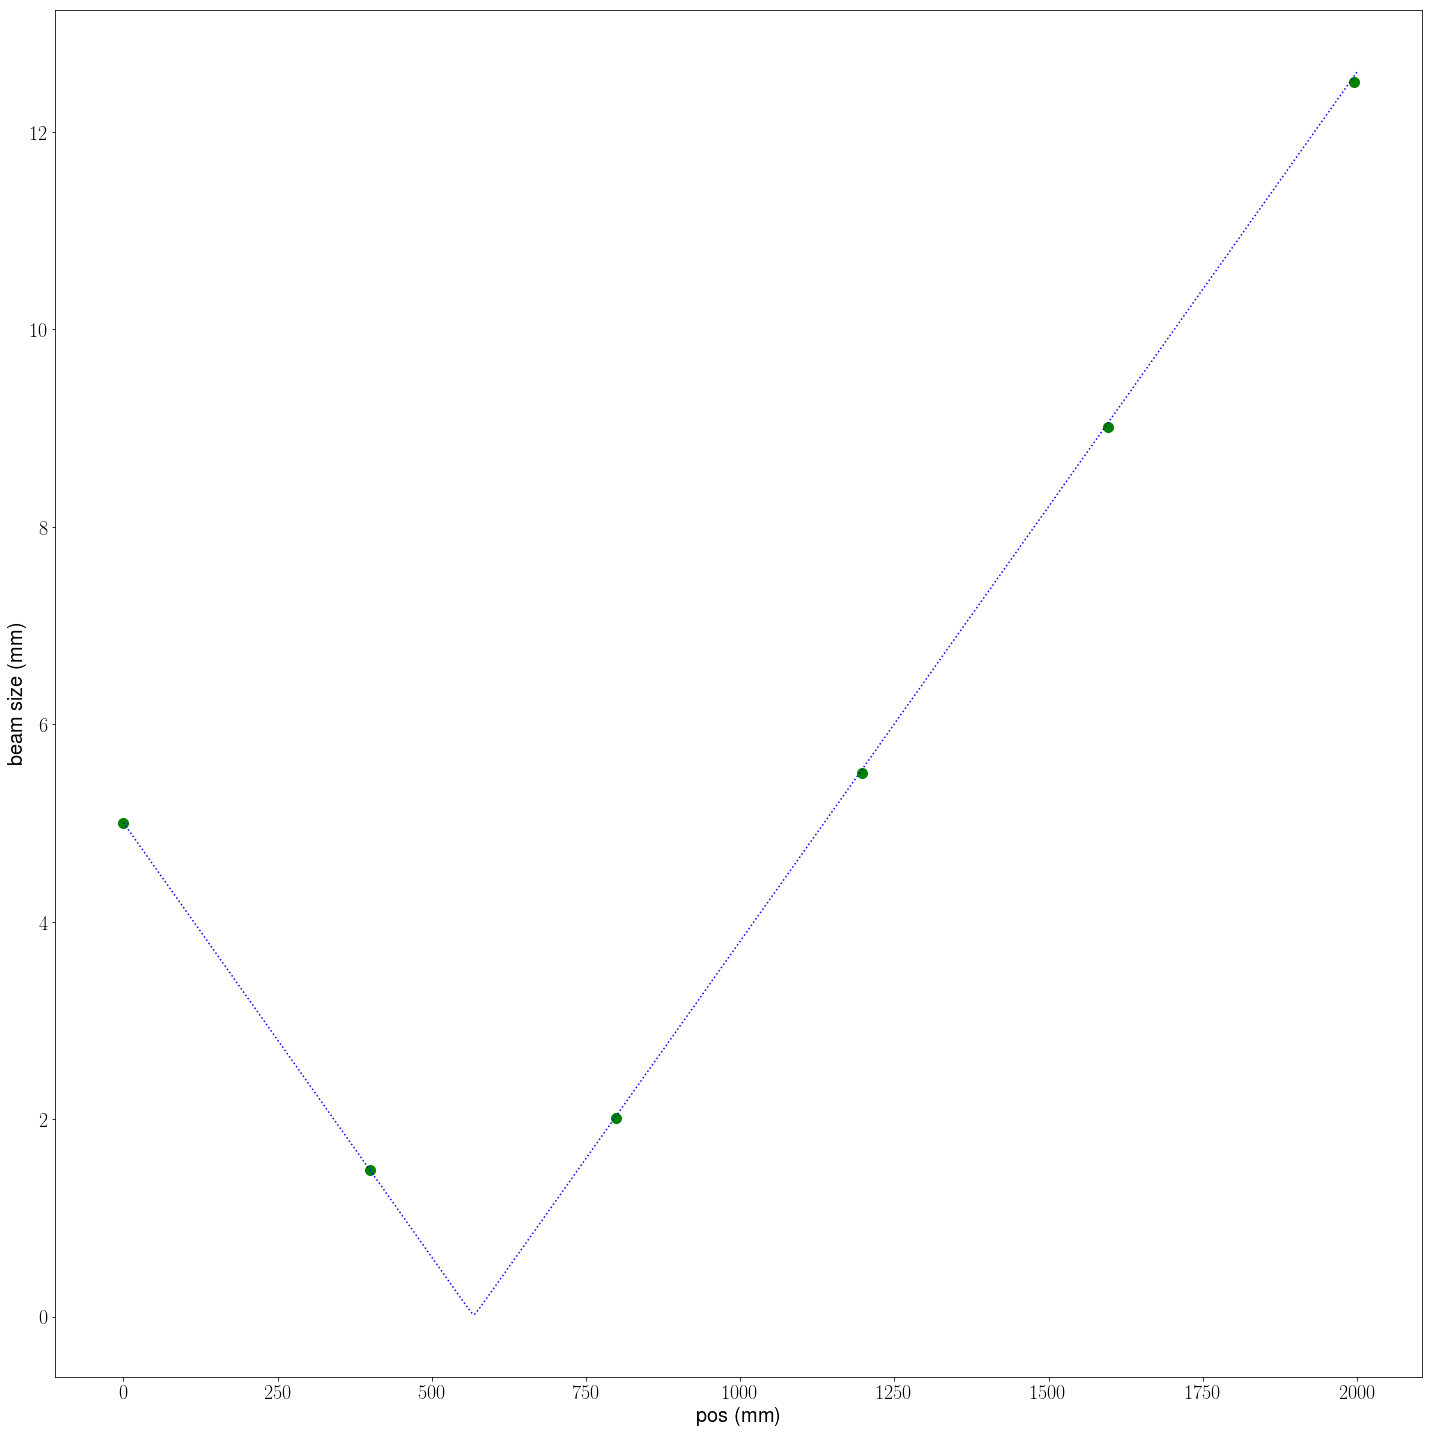

In [3]:
path = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/transport_adjusted_lens/l1m2_col_data'

cpath = Popen(["pwd"], cwd=path, stdout=PIPE, stderr=PIPE )
lpath = Popen(['ls'], cwd = path, stdout=PIPE, stderr=PIPE )
path_data = cpath.communicate()[0].decode('utf-8').rstrip()
ldata = lpath.communicate()[0].decode('utf-8').splitlines()
labels = []
paths = []
for i in ldata:
    labels.append(i)
    paths.append(path_data+'/'+i)

print(labels)

data = data_generator(paths)


labels.insert(0, labels.pop())

print(labels)

data.insert(0, data.pop())

#plot_generator(data, 2, 3, 20, 20, 0.95, 20, 20, 20, 'x', 'irr', 'transport first segment', labels, 'f1seg')

waist = np.multiply(2, fit_parameter_extractor(gaussian, data)[2])
print(waist)

lens_arr = []

pos = np.arange(0, 2000,399)
lens_pos = np.arange(0,2000,0.01)
print(pos)

for i in lens_pos:
    lens_arr.append(lens_waist_size(i,5,600,568 ))

plt.figure(figsize=(20,20))
plt.plot(lens_pos, lens_arr, color = 'blue', linestyle=':')
plt.scatter(pos, waist, color = 'green', s=100)
plt.xlabel('pos (mm)', fontsize=20)
plt.ylabel('beam size (mm)',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
plt.tight_layout()


In [44]:
def lens_maker_eq_rad(radial_guess, index_refraction, focal_length):
    #r1 is a guess, so it will be optimized. 
    curr_guess = np.divide(radial_guess, index_refraction-1)
    while curr_guess < focal_length:
        radial_guess = radial_guess + 0.01
        print(radial_guess)
        curr_guess = np.divide(radial_guess, index_refraction-1)
        print(curr_guess)


In [55]:
print(raleigh_range(5,600))

130899.6939
